In [1]:
import glob
import itertools
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

sns.set(font_scale = 1.0, style = 'darkgrid')
palette6 = sns.color_palette(["#C7243A", "#EDAD0B", "#A4C520", "#23AC0E", "#3261AB", "#744199"], 6)
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
COLUMNS = {
    'network_type': str,
    'hop_game': int,
    'hop_learning': int,
    'b': float,
    'μ': float,
    'δ': float,
    'interaction_rule': str,
    'update_rule': str,
    'trial': int,
    'cooperator_rate': float
}
GROUPBY_COLUMNS = [c for c in COLUMNS if c not in ['trial', 'cooperator_rate']]

def load_df(csv_file_name: str) -> pd.DataFrame:
    _df = pd.read_csv(csv_file_name, header=None, names=COLUMNS.keys(), dtype=COLUMNS)
    return _df.groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()

In [3]:
df_All_Pairwise_BD = load_df('../data/clean_data/All_Pairwise_BD.csv')

# 図10. 非対称性は協力を阻害する
df_Random_Pairwise_DB_1 = load_df('../data/clean_data/Random_Pairwise_DB.csv')
df_Random_Pairwise_DB_2 = load_df('../data/clean_data/Random_Pairwise_DB_2.csv')
df_Random_Pairwise_DB = pd.concat([df_Random_Pairwise_DB_1, df_Random_Pairwise_DB_2])\
    .groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()

df_Regular_Pairwise_DB_1 = load_df('../data/clean_data/Regular_Pairwise_DB.csv')
df_Regular_Pairwise_DB_2 = load_df('../data/clean_data/Regular_Pairwise_DB_2.csv')
df_Regular_Pairwise_DB_3 = load_df('../data/clean_data/Regular_Pairwise_DB_3.csv')
df_Regular_Pairwise_DB = pd.concat([df_Regular_Pairwise_DB_1, df_Regular_Pairwise_DB_2, df_Regular_Pairwise_DB_3])\
    .groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()

# 図11. スパイク
df_ScaleFree_PairWise_DB_IM = load_df('../data/clean_data/ScaleFree_PairWise_DB_IM.csv')
df_Random_PairWise_IM = load_df('../data/clean_data/Random_PairWise_IM.csv')
df_Regular_PairWise_IM = load_df('../data/clean_data/Regular_PairWise_IM.csv')

# 図12. N人ゲームでh_Gを増やすと協力は進化しない
df_All_Group_All = load_df('../data/clean_data/All_Group_All.csv')

# 図13. 谷
df_ScaleFree_Group_DB = pd.read_csv('../data/clean_data/ScaleFree_Group_DB.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)
df_ScaleFree_Group_DB = pd.concat([df_ScaleFree_Group_DB, df_All_Group_All]).reset_index()
df_ScaleFree_Group_IM = pd.read_csv('../data/clean_data/ScaleFree_Group_IM.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)
df_ScaleFree_Group_IM = pd.concat([df_ScaleFree_Group_IM, df_All_Group_All]).reset_index()
df_Random_Group_DB = pd.read_csv('../data/clean_data/Random_Group_DB.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)
df_Random_Group_DB = pd.concat([df_Random_Group_DB, df_All_Group_All]).reset_index()
df_Random_Group_IM = pd.read_csv('../data/clean_data/Random_Group_IM.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)
df_Random_Group_IM = pd.concat([df_Random_Group_IM, df_All_Group_All]).reset_index()

# 図14. 不安定
df_Regular_Group_DB = pd.read_csv('../data/clean_data/Regular_Group_DB.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)
df_Regular_Group_IM = pd.read_csv('../data/clean_data/Regular_Group_IM.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)

# Figure 3

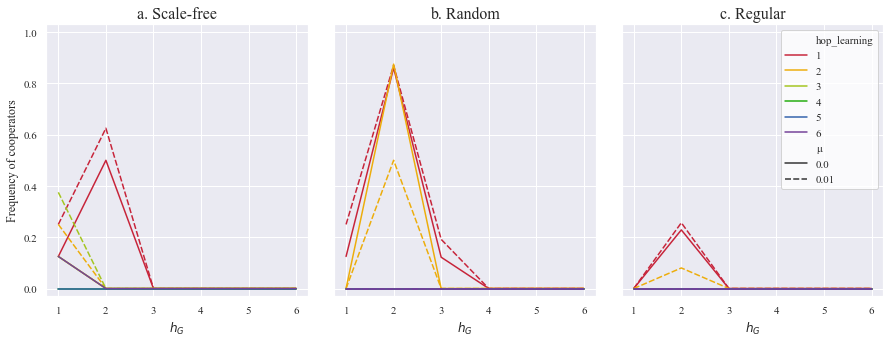

In [4]:
fig, axes = plt.subplots(ncols = 3, nrows = 1, sharey=True, figsize = (15, 5))
plt.subplots_adjust(wspace=0.1)

axes[0].set_title('a. Scale-free', fontsize=16)
sns.lineplot(x='hop_game', y='cooperator_rate', hue='hop_learning', style='μ', palette=palette6, ax=axes[0], data=df_ScaleFree_PairWise_DB_IM[
    (df_ScaleFree_PairWise_DB_IM.update_rule == 'DB') &
    (df_ScaleFree_PairWise_DB_IM.b == 1.1)
])
axes[0].get_legend().remove()

axes[1].set_title('b. Random', fontsize=16)
sns.lineplot(x='hop_game', y='cooperator_rate', hue='hop_learning', style='μ', palette=palette6, ax=axes[1], data=df_Random_PairWise_IM[
    (df_Random_PairWise_IM.b == 1.1)
])
axes[1].get_legend().remove()

axes[2].set_title('c. Regular', fontsize=16)
sns.lineplot(x='hop_game', y='cooperator_rate', hue='hop_learning', style='μ', palette=palette6, ax=axes[2], data=df_Regular_PairWise_IM[
    (df_Regular_PairWise_IM.b == 1.1) &
    df_Regular_PairWise_IM.δ.isin([0.01])
])
axes[2].legend(facecolor='white')

for ax in axes:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylabel('Frequency of cooperators')
    ax.set_xlabel('$h_G$')
    ax.set_ylim(-0.03, 1.03)

# Figure 2

In [5]:
df_ScaleFree_Group_DB

,index,network_type,hop_game,hop_learning,b,μ,δ,interaction_rule,update_rule,trial,cooperator_rate
0,0,scale_free_4,1,1,5.0,0.00,1.00,Group,DB,6.0,1.0
1,1,scale_free_4,1,2,5.0,0.00,1.00,Group,DB,6.0,0.0
2,2,scale_free_4,1,3,5.0,0.00,1.00,Group,DB,6.0,1.0
3,3,scale_free_4,1,4,5.0,0.00,1.00,Group,DB,6.0,0.0
4,4,scale_free_4,1,5,5.0,0.00,1.00,Group,DB,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8323,7843,scale_free_4,6,6,6.0,0.01,0.25,Group,DB,NaN,0.0
8324,7844,scale_free_4,6,6,6.0,0.01,0.25,Group,IM,NaN,0.0
8325,7845,scale_free_4,6,6,6.0,0.01,1.00,Group,BD,NaN,0.0
8326,7846,scale_free_4,6,6,6.0,0.01,1.00,Group,DB,NaN,0.0


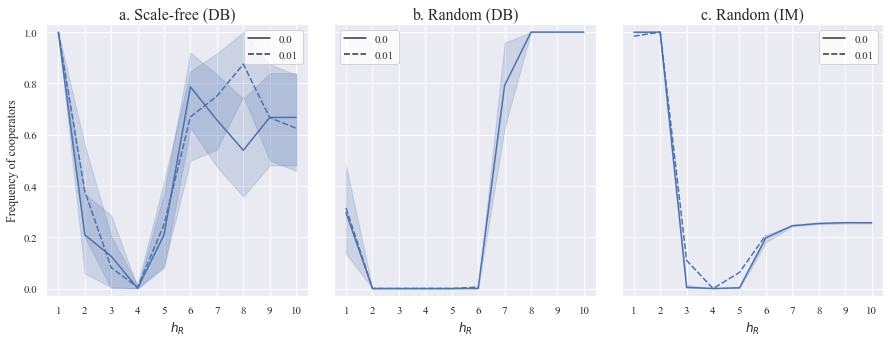

In [6]:
fig, axes = plt.subplots(ncols = 3, nrows = 1, sharey=True, figsize = (15, 5))
plt.subplots_adjust(wspace=0.1)


_ax = axes[0]
_ax.set_title('a. Scale-free (DB)', fontsize=16)
sns.lineplot(x='hop_learning', y='cooperator_rate', style='μ', ax=_ax, data=df_ScaleFree_Group_DB[
    (df_ScaleFree_Group_DB.network_type == 'scale_free_4') &
    (df_ScaleFree_Group_DB.interaction_rule == 'Group') &
    (df_ScaleFree_Group_DB.update_rule == 'DB') &
    (df_ScaleFree_Group_DB.hop_game == 1) &
    (df_ScaleFree_Group_DB.hop_learning <= 10) &
    (df_ScaleFree_Group_DB.b == 5.0) &
    (df_ScaleFree_Group_DB.δ == 1.0)
])

_ax = axes[1]
_ax.set_title('b. Random (DB)', fontsize=16)
sns.lineplot(x='hop_learning', y='cooperator_rate', style='μ', ax=_ax, data=df_Random_Group_DB[
    (df_Random_Group_DB.network_type == 'random_4') &
    (df_Random_Group_DB.interaction_rule == 'Group') &
    (df_Random_Group_DB.update_rule == 'DB') &
    (df_Random_Group_DB.hop_game == 1) &
    (df_Random_Group_DB.hop_learning <= 10) &
    (df_Random_Group_DB.b == 5.0) &
    (df_Random_Group_DB.δ == 1.0)
])

_ax = axes[2]
_ax.set_title('c. Random (IM)', fontsize=16)
sns.lineplot(x='hop_learning', y='cooperator_rate', style='μ', ax=_ax, data=df_Random_Group_IM[
    (df_Random_Group_IM.network_type == 'random_4') &
    (df_Random_Group_IM.interaction_rule == 'Group') &
    (df_Random_Group_IM.update_rule == 'IM') &
    (df_Random_Group_IM.hop_game == 1) &
    (df_Random_Group_IM.hop_learning <= 10) &
    (df_Random_Group_IM.b == 5.0) &
    (df_Random_Group_IM.δ == 1.0)
])

for ax in axes:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylim(-0.03, 1.03)
    ax.set_ylabel('Frequency of cooperators')
    ax.set_xlabel('$h_R$')
    ax.legend(facecolor='white')